In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_data.csv')

In [27]:
test = pd.read_csv('titanic_data_test.csv')

In [28]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Visulisation

Percentage of Woman Survived :  74.20382165605095
Percentage of Man Survived :  18.890814558058924


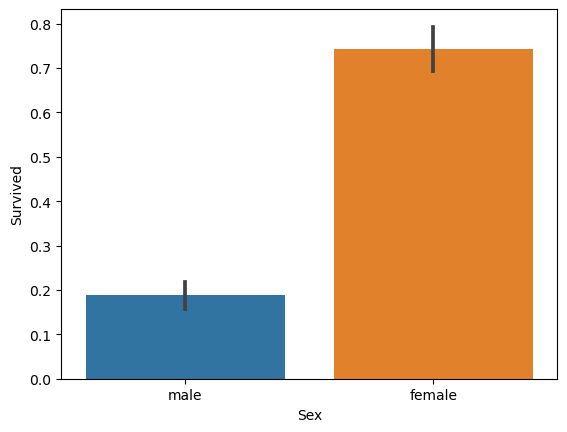

In [10]:
sns.barplot(x = 'Sex', y = 'Survived', data = data)

print('Percentage of Woman Survived : ', data['Survived'][data['Sex'] == 'female'].value_counts(normalize = True)[1]*100)

print('Percentage of Man Survived : ', data['Survived'][data['Sex'] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 Survived :  62.96296296296296
Percentage of Pclass = 2 Survived :  47.28260869565217
Percentage of Pclass = 3 Survived :  24.236252545824847


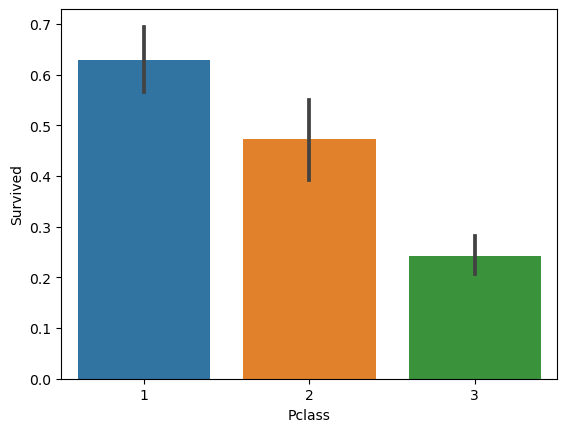

In [11]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data)

print('Percentage of Pclass = 1 Survived : ', data['Survived'][data['Pclass'] == 1].value_counts(normalize = True)[1]*100)

print('Percentage of Pclass = 2 Survived : ', data['Survived'][data['Pclass'] == 2].value_counts(normalize = True)[1]*100)

print('Percentage of Pclass = 3 Survived : ', data['Survived'][data['Pclass'] == 3].value_counts(normalize = True)[1]*100)

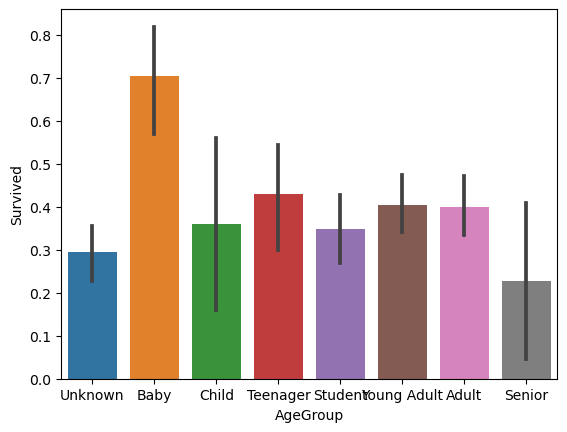

In [48]:
data.Age = data.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)

bins = [-1,0,5,12,18,24,35,60,np.inf]

labels = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

data['AgeGroup'] = pd.cut(data['Age'], bins,labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins,labels = labels)


sns.barplot(x = 'AgeGroup', y = 'Survived', data = data)
plt.show()

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [31]:
data = data.drop(['Ticket','Cabin','Fare'], axis = 1)
 ## here data will delete previously and rerun so getsthe error

KeyError: "['Ticket', 'Cabin', 'Fare'] not found in axis"

In [32]:
test = test.drop(['Ticket','Cabin','Fare'], axis = 1)


### Dialing with missing Values

In [19]:
print('Number of peoprle embarking in Southampton(S) :')
southampton = data[data['Embarked'] == 'S'].shape[0]
print(southampton)

print('Number of peoprle embarking in Cherbourg(C) :')
cherbourg = data[data['Embarked'] == 'C'].shape[0]
print(cherbourg)

print('Number of peoprle embarking in Queenstown(Q) :')
queenstown = data[data['Embarked'] == 'Q'].shape[0]
print(queenstown)

Number of peoprle embarking in Southampton(S) :
644
Number of peoprle embarking in Cherbourg(C) :
168
Number of peoprle embarking in Queenstown(Q) :
77


In [26]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [25]:
data['Embarked'].fillna('S', inplace=True)


In [33]:
combine = [data, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False)
    
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr


In [37]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [39]:
list(data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()['Title'])

['Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal']

In [40]:
title_mapping = {'Mr' : 1,'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [49]:
mr_age = data[data['Title'] == 1]['AgeGroup'].mode()         ## Young Adult
miss_age = data[data['Title'] == 2]['AgeGroup'].mode()       ##  UnKnown
mrs_age = data[data['Title'] == 3]['AgeGroup'].mode()        ## Adult
master_age = data[data['Title'] == 4]['AgeGroup'].mode()     ## Baby
royal_age = data[data['Title'] == 5]['AgeGroup'].mode()      ## Adult
rare_age = data[data['Title'] == 6]['AgeGroup'].mode()        ## Adult


age_title_map = {1: 'Young Adult', 2: 'Student', 3 :'Adult', 4 : 'Baby', 5:'Adult', 6: 'Adult'}

for i in range(len(data['AgeGroup'])):
    if data['AgeGroup'][i] == 'Unknown':
        data['AgeGroup'][i] = age_title_map[data['Title'][i]]
        

for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i] == 'Unknown':
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]

In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,Young Adult,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,Student,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,S,Student,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,Young Adult,1


In [51]:
data.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


transform = ['Sex','AgeGroup','Embarked']

for i in transform:
    data[i] = le.fit_transform(data[i])

In [65]:
for i in transform:
    test[i] = le.fit_transform(test[i])

## Modeling Dataset

In [77]:
x_train = data.drop(['PassengerId', 'Name', 'Survived', 'Title'], axis = 1)
y_train = data['Survived']

x_test = test.drop(['PassengerId', 'Name','Survived', 'Title'], axis = 1)

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_test)

In [81]:
preds

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [84]:
ids = test['PassengerId']

output = pd.DataFrame({'PassengerId': ids, 'Survived': preds})

output.to_csv('submission.csv', index = False)